# Step 1 : INSTALL NECESSARY MODULE

In [1]:
pip install opencv-python numpy tensorflow scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 459.5 kB/s eta 0:01:23
   ---------------------------------------- 0.1/38.1 MB 459.5 kB/s eta 0:01:23
   ---------------------------------------- 0.1/38.1 MB 327.7 kB/s eta 0:01:56
   ---------------------------------------- 0.1/38.1 MB 379.3 kB/s eta 0:01:41
   ---------------------------------------- 0.1/38.1 MB 379.3 kB/s eta 0:01:41
   ---------------------------------------- 0.1/38.1 MB 379.3 kB/s eta 0:01:41
   ---------------------

# Step 2: Import Required Libraries

In [2]:
# Import necessary libraries
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Step 3: Load and Prepare Your Dataset

In [3]:
def load_dataset(person_paths):
    images = []
    labels = []

    label_mapping = {
        "Aarav": 0,
        "Anshi": 1,
        "Aviral": 2,
        "Mummy": 3
    }

    for person_name, person_folder in person_paths.items():
        if person_name in label_mapping:
            label_id = label_mapping[person_name]
            for image_file in os.listdir(person_folder):
                image_path = os.path.join(person_folder, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                if image is not None:
                    image = cv2.resize(image, (128, 128))  # Resize to a consistent size
                    image = image / 255.0  # Normalize pixel values to [0, 1]
                    images.append(image)
                    labels.append(label_id)

    return np.array(images), np.array(labels)

# Specify the paths for each person's folder
person_paths = {
    "Aarav": r"G:/Dataset/Aarav",
    "Anshi": r"G:/Dataset/Anshi",
    "Aviral": r"G:/Dataset/Aviral",
    "Mummy": r"G:/Dataset/Mummy"
}

# Load the dataset
images, labels = load_dataset(person_paths)


# Step 4: Display Sample Images

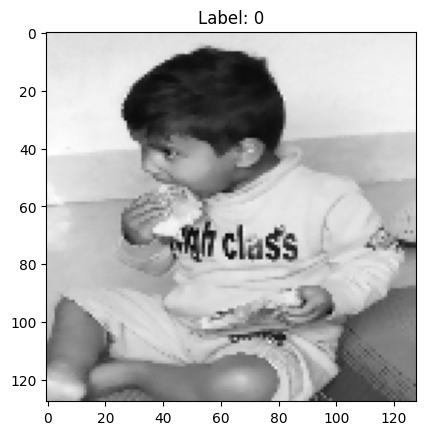

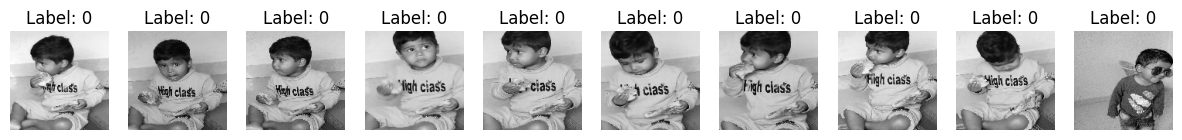

In [4]:
# Display a single image
plt.imshow(images[0], cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.show()

# Display multiple images in a grid
num_samples_to_display = 10
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 3))

for i in range(num_samples_to_display):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(f'Label: {labels[i]}')
    axes[i].axis('off')

plt.show()


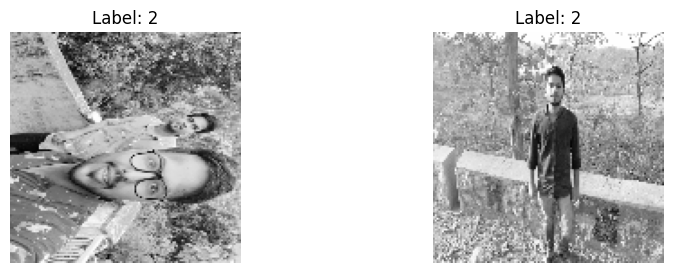

In [5]:
import random
import matplotlib.pyplot as plt

# Load the dataset using your function
images, labels = load_dataset(person_paths)

# Display two random images with their labels
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

random_indices = random.sample(range(len(images)), 2)  # Get two random indices

for i in range(2):
    index = random_indices[i]
    axes[i].imshow(images[index], cmap='gray')
    axes[i].set_title(f'Label: {labels[index]}')
    axes[i].axis('off')

plt.show()

# Step 5: Shuffle and Display Random Images

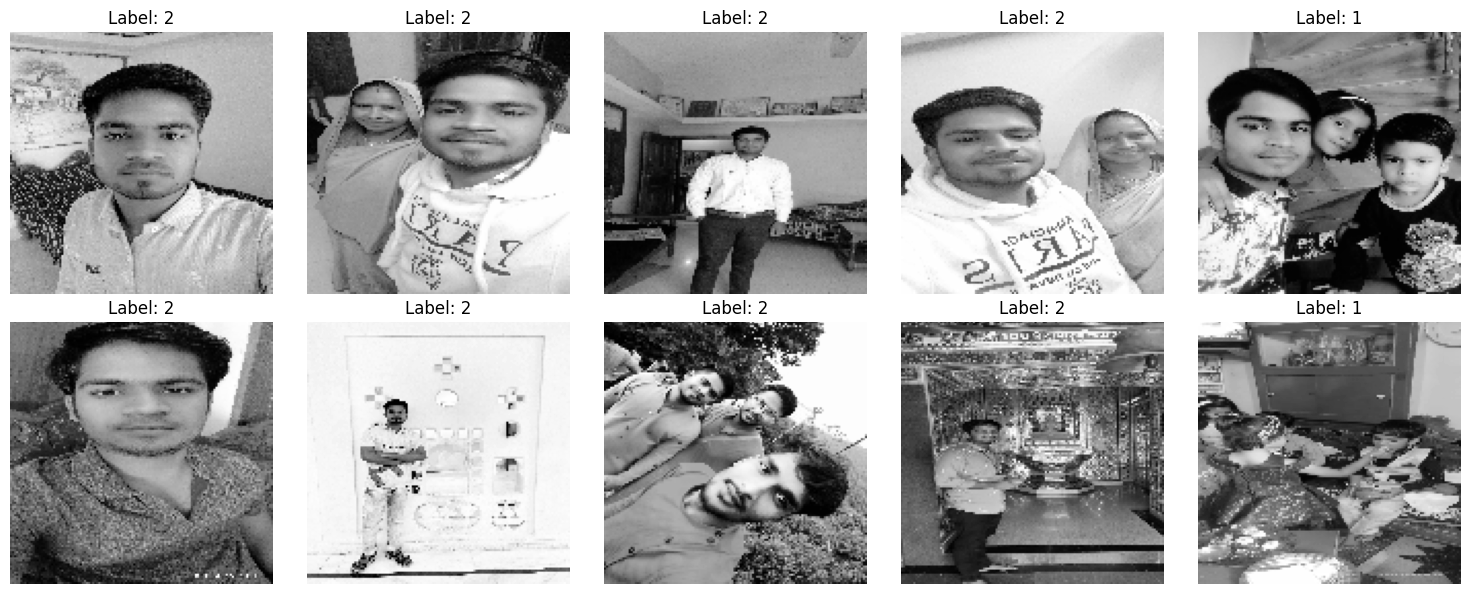

In [6]:
# Shuffle the indices randomly
num_samples = len(images)
random_indices = random.sample(range(num_samples), num_samples)

# Display multiple random images
num_samples_to_display = 10

# Calculate the number of rows and columns for the subplots
num_rows = 2  # Set the number of rows
num_cols = num_samples_to_display // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))  # Adjust figsize as needed

for i in range(num_samples_to_display):
    row_idx = i // num_cols
    col_idx = i % num_cols
    random_idx = random_indices[i]

    axes[row_idx, col_idx].imshow(images[random_idx], cmap='gray')
    axes[row_idx, col_idx].set_title(f'Label: {labels[random_idx]}')
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()


# Step 6: Split the Dataset

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# Step 7:Data Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Reshape the training data to include the channel dimension
X_train = X_train.reshape(-1, 128, 128, 1)

# Fit the data generator on your training data
datagen.fit(X_train)


# Step 8: Build and Train Your Model

In [9]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Adjust the output neurons based on the number of classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=10,
                    validation_data=(X_test, y_test))


model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
15/15 [==============================] - 17s 943ms/step - loss: 0.9022 - accuracy: 0.7610 - val_loss: 0.8118 - val_accuracy: 0.7460
Epoch 2/10
15/15 [==============================] - 17s 1s/step - loss: 0.7088 - accuracy: 0.8048 - val_loss: 1.1206 - val_accuracy: 0.7460
Epoch 3/10
15/15 [==============================] - 14s 891ms/step - loss: 0.6620 - accuracy: 0.8048 - val_loss: 1.0019 - val_accuracy: 0.7460
Epoch 4/10
15/15 [==============================] - 22s 1s/step - loss: 0.6689 - accuracy: 0.8048 - val_loss: 0.7487 - val_accuracy: 0.7302
Epoch 5/10
15/15 [==============================] - 16s 1s/step - loss: 0.6680 - accuracy: 0.7968 - val_loss: 0.8941 - val_accuracy: 0.7302
Epoch 6/10
15/15 [==============================] - 16s 991ms/step - loss: 0.6513 - accuracy: 0.8048 - val_loss: 0.9074 - val_accuracy: 0.7222
Epoch 7/10
15/15 [==============================] - 22s 1s/step - loss: 0.6201 - accuracy: 0.8028 - val_loss: 0.7265 - val_accuracy: 0.7540
Epoch 8/10


# Step 9: Save and Evaluate Your Model

In [18]:
# Save your trained model
model.save("C:/Users/Aviral/ALL FILES/PROJECTS/PHOTOS_NAME_PREDICTIONS/Dataset/save model/Aviral_Jain_model.h5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


c:\Users\Aviral\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 226ms/step - loss: 1.2032 - accuracy: 0.8175
Test accuracy: 0.817460298538208


# Step 10: Make Predictions

In [19]:

import cv2
import numpy as np
from tensorflow import keras

# Load your trained model (replace 'your_model_path' with the actual path to your model)
model = keras.models.load_model("C:/Users/Aviral/ALL FILES/PROJECTS/PHOTOS_NAME_PREDICTIONS/Dataset/save model/Aviral_Jain_model.h5")

def preprocess_input_image(image_path):
    # Load and preprocess the input image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        image = cv2.resize(image, (128, 128))  # Resize to match the model's input size
        image = image / 255.0  # Normalize pixel values to [0, 1]
        return np.expand_dims(image, axis=0)  # Add a batch dimension
    else:
        return None

def predict_person(image_path):
    input_image = preprocess_input_image(image_path)

    if input_image is not None:
        predictions = model.predict(input_image)

        # Map predicted class probabilities to person names based on your label mapping
        label_mapping = {
            0: "Aarav",
            1: "Anshi",
            2: "Aviral",
            3: "Mummy"
        }

        predicted_label = np.argmax(predictions)
        predicted_person = label_mapping.get(predicted_label, "Unknown")

        return predicted_person
    else:
        return "Image loading failed"

# Example usage:
image_path = input("Enter the path to the user input image: ")
predicted_name = predict_person(image_path)
print(f"Predicted person: {predicted_name}")


1/1 [==============================] - 0s 200ms/step
Predicted person: Anshi


In [2]:
import cv2
import numpy as np
from tensorflow import keras

# Load your trained model (replace 'your_model_path' with the actual path to your model)
model = keras.models.load_model("C:/Users/Aviral/Aviral_Jain_model.h5")

def preprocess_input_image(image_path):
    # Load and preprocess the input image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        image = cv2.resize(image, (128, 128))  # Resize to match the model's input size
        image = image / 255.0  # Normalize pixel values to [0, 1]
        return np.expand_dims(image, axis=0)  # Add a batch dimension
    else:
        return None

def predict_person(image_path):
    input_image = preprocess_input_image(image_path)

    if input_image is not None:
        predictions = model.predict(input_image)

        # Map predicted class probabilities to person names based on your label mapping
        label_mapping = {
            0: "Aarav",
            1: "Anshi",
            2: "Aviral",
            3: "Mummy"
        }

        predicted_label = np.argmax(predictions)
        predicted_person = label_mapping.get(predicted_label, "Unknown")

        return predicted_person
    else:
        return "Image loading failed"

# Loop to continue or exit
while True:
    image_path = input("Enter the path to the user input image (or enter 'exit' to quit): ")
    
    if image_path.lower() == 'exit':
        break
    
    predicted_name = predict_person(image_path)
    print(f"Predicted person: {predicted_name}")


Enter the path to the user input image (or enter 'exit' to quit): G:\Dataset\Mummy\IMG_20210916_143709.jpg
1/1 [==============================] - 0s 109ms/step
Predicted person: Mummy
Enter the path to the user input image (or enter 'exit' to quit): exit


1/1 [==============================] - 0s 170ms/step
Predicted person: Anshi


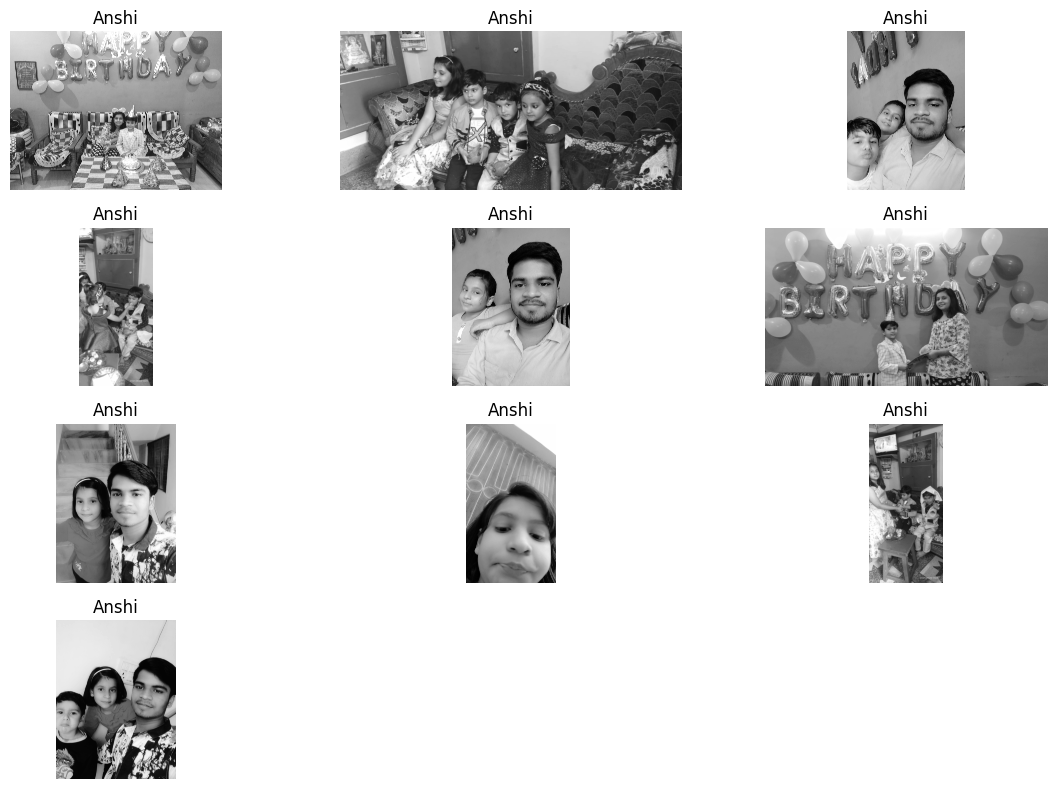

In [21]:
import cv2
import numpy as np
from tensorflow import keras
import os
import random
import matplotlib.pyplot as plt

# Load your trained model (replace 'your_model_path' with the actual path to your model)
model = keras.models.load_model("C:/Users/Aviral/Aviral_Jain_model.h5")

def preprocess_input_image(image_path):
    # Load and preprocess the input image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        image = cv2.resize(image, (128, 128))  # Resize to match the model's input size
        image = image / 255.0  # Normalize pixel values to [0, 1]
        return np.expand_dims(image, axis=0)  # Add a batch dimension
    else:
        return None

def predict_person(image_path):
    input_image = preprocess_input_image(image_path)

    if input_image is not None:
        predictions = model.predict(input_image)

        # Map predicted class probabilities to person names based on your label mapping
        label_mapping = {
            0: "Aarav",
            1: "Anshi",
            2: "Aviral",
            3: "Mummy"
        }

        predicted_label = np.argmax(predictions)
        predicted_person = label_mapping.get(predicted_label, "Unknown")

        return predicted_person
    else:
        return "Image loading failed"

# Input: Enter the path to the user input image
image_path = input("Enter the path to the user input image: ")

# Debugging the image path
if not os.path.isfile(image_path):
    print("Image path is invalid or does not exist.")
else:
    # Get the predicted person's name
    predicted_name = predict_person(image_path)
    print(f"Predicted person: {predicted_name}")

    if predicted_name != "Unknown":
        # Input: How many random photos to display in the collage
        num_random_photos = int(input("Enter the number of random photos to display in the collage: "))

        # Specify the folder path for the predicted person's photos
        predicted_person_folder = f"G:/Dataset/{predicted_name}"

        if os.path.exists(predicted_person_folder):
            # List all photos in the folder
            photo_files = os.listdir(predicted_person_folder)

            # Randomly select 'num_random_photos' photos
            selected_photos = random.sample(photo_files, num_random_photos)

            # Create a collage (subplot) for the selected photos
            num_rows = int(np.ceil(num_random_photos / 3))  # 3 photos per row
            fig, axes = plt.subplots(num_rows, 3, figsize=(12, 8))

            for i, photo_file in enumerate(selected_photos):
                photo_path = os.path.join(predicted_person_folder, photo_file)
                photo = cv2.imread(photo_path, cv2.IMREAD_GRAYSCALE)

                if photo is not None:
                    row_idx = i // 3
                    col_idx = i % 3
                    axes[row_idx, col_idx].imshow(photo, cmap='gray')  # Change cmap to adjust photo color
                    axes[row_idx, col_idx].set_title(predicted_name, fontsize=12)  # Change title color
                    axes[row_idx, col_idx].axis('off')

            # Remove empty subplots if necessary
            for i in range(num_random_photos, num_rows * 3):
                row_idx = i // 3
                col_idx = i % 3
                fig.delaxes(axes[row_idx, col_idx])

            plt.tight_layout()
            plt.show()
        else:
            print(f"Folder for {predicted_name} does not exist.")
    else:
        print("Cannot display photos for an unknown person.")


# THANKS